# Load and reform Worldbank data.

The json file has format: [{},{},{}, ...]. Each dictionary inside kas keys: country, year, meaning, value. The 'meaning' field can vary: it can be 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)', 'Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)', 'Renewable energy consumption (% of total final energy consumption)', etc.  To bring this dataset to a convenient form with these columns: country, year, Carbon_dioxide_CO2_emissions_total_excluding_LULUCF_Mt_CO2e, Forest_area_%_of_land_area, PM2.5_air_pollution_mean_annual_exposure_micrograms_per_cubic_meter, Renewable_energy_consumption_%_of_total_final_energy_consumption.

In [1]:
import pandas as pd
import json

with open('../data/worldbank_data.json') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()

,country,year,meaning,value
0,Africa Eastern and Southern,2023,Carbon dioxide (CO2) emissions (total) excludi...,579.8655
1,Africa Eastern and Southern,2022,Carbon dioxide (CO2) emissions (total) excludi...,588.4335
2,Africa Eastern and Southern,2021,Carbon dioxide (CO2) emissions (total) excludi...,606.3945
3,Africa Eastern and Southern,2020,Carbon dioxide (CO2) emissions (total) excludi...,578.0520
4,Africa Eastern and Southern,2019,Carbon dioxide (CO2) emissions (total) excludi...,654.5401


In [2]:
pivot_df = df.pivot(index=['country', 'year'], columns='meaning', values='value').reset_index()
pivot_df.columns = [col.replace(" ", "_").replace("(", "").replace(")", "") for col in pivot_df.columns]
pivot_df.head()

,country,year,Carbon_dioxide_CO2_emissions_total_excluding_LULUCF_Mt_CO2e,Forest_area_%_of_land_area,"PM2.5_air_pollution,_mean_annual_exposure_micrograms_per_cubic_meter",Renewable_energy_consumption_%_of_total_final_energy_consumption
0,Afghanistan,1970,1.7339,NaN,NaN,NaN
1,Afghanistan,1971,1.7337,NaN,NaN,NaN
2,Afghanistan,1972,1.6936,NaN,NaN,NaN
3,Afghanistan,1973,1.7339,NaN,NaN,NaN
4,Afghanistan,1974,2.1903,NaN,NaN,NaN


<Axes: >

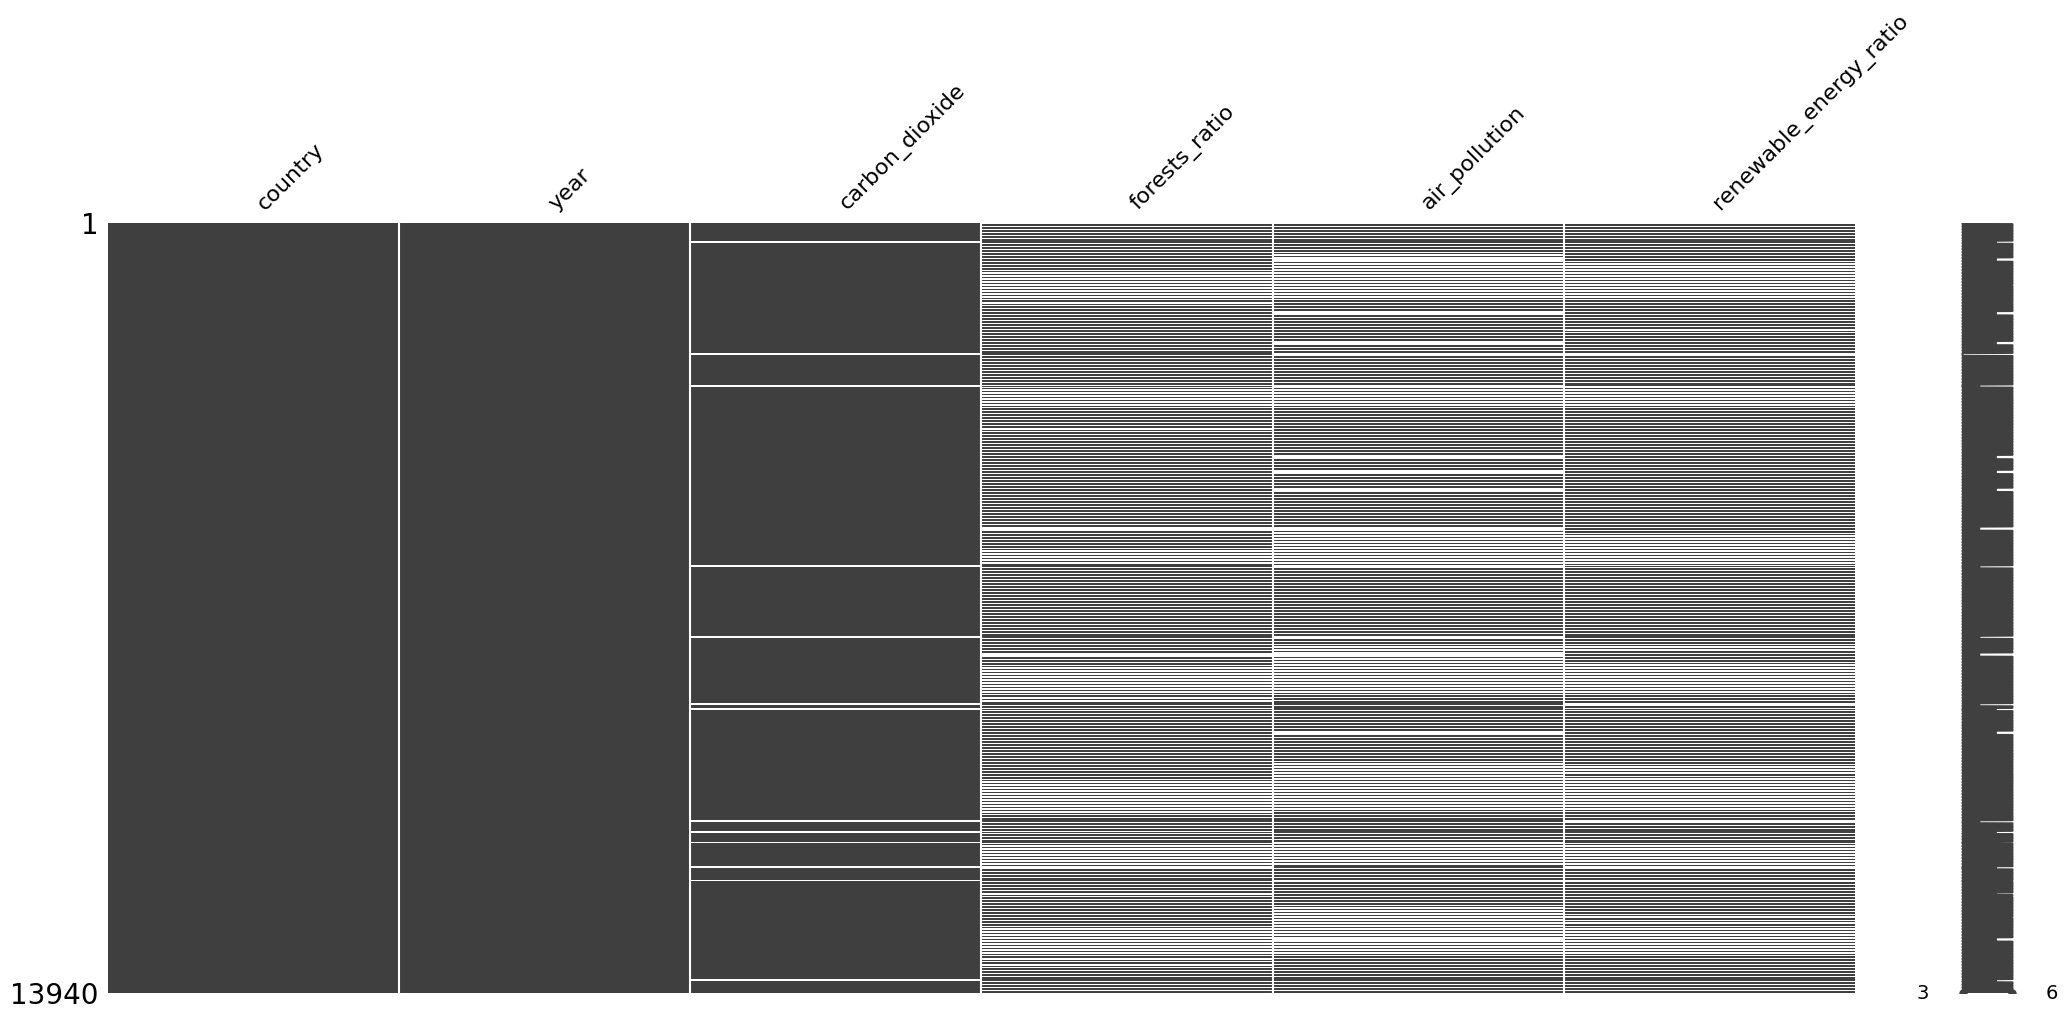

In [7]:
import missingno as msno 
msno.matrix(pivot_df) 


Several values before the 1990th and in the last years (2020-2024) are absent. But we chouldn't drop them, because in the app we can demonstrate just available statistics.

In [3]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13940 entries, 0 to 13939
Data columns (total 6 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   country                                                               13940 non-null  object 
 1   year                                                                  13940 non-null  object 
 2   Carbon_dioxide_CO2_emissions_total_excluding_LULUCF_Mt_CO2e           13554 non-null  float64
 3   Forest_area_%_of_land_area                                            8409 non-null   float64
 4   PM2.5_air_pollution,_mean_annual_exposure_micrograms_per_cubic_meter  7688 non-null   float64
 5   Renewable_energy_consumption_%_of_total_final_energy_consumption      8234 non-null   float64
dtypes: float64(4), object(2)
memory usage: 653.6+ KB


In [4]:
pivot_df.describe()

,Carbon_dioxide_CO2_emissions_total_excluding_LULUCF_Mt_CO2e,Forest_area_%_of_land_area,"PM2.5_air_pollution,_mean_annual_exposure_micrograms_per_cubic_meter",Renewable_energy_consumption_%_of_total_final_energy_consumption
count,13554.000000,8409.000000,7688.000000,8234.000000
mean,884.153969,32.494707,28.317114,31.251194
std,3117.491830,23.440415,16.331707,29.694407
min,0.000000,0.000000,4.895181,0.000000
25%,1.374075,12.329931,16.755707,5.400000
50%,17.273550,31.150263,23.986899,21.500000
75%,187.764800,47.594804,38.970746,54.100000
max,39023.937039,96.226381,107.144665,98.300000


In [5]:
# rename columns to a convenient form and save to the csv format
pivot_df = pivot_df.rename(columns={
    'Carbon_dioxide_CO2_emissions_total_excluding_LULUCF_Mt_CO2e': 'carbon_dioxide', 
    'Forest_area_%_of_land_area': 'forests_ratio',
    'PM2.5_air_pollution,_mean_annual_exposure_micrograms_per_cubic_meter': 'air_pollution',
    'Renewable_energy_consumption_%_of_total_final_energy_consumption': 'renewable_energy_ratio'
    })
pivot_df.to_csv('../data/worldbank_data.csv', index=False)
pivot_df.head()


,country,year,carbon_dioxide,forests_ratio,air_pollution,renewable_energy_ratio
0,Afghanistan,1970,1.7339,NaN,NaN,NaN
1,Afghanistan,1971,1.7337,NaN,NaN,NaN
2,Afghanistan,1972,1.6936,NaN,NaN,NaN
3,Afghanistan,1973,1.7339,NaN,NaN,NaN
4,Afghanistan,1974,2.1903,NaN,NaN,NaN


# Load countries data from Worldbank.

Lets see, how we can use countries_data.json (for example, to extract countries which capital city we know and avoid group measurements (Africa Eastern and Southern for example))

In [26]:
with open('../data/countries_data.json') as f:
	data = json.load(f)

countries_df = pd.DataFrame(data[0])
countries_df = countries_df[countries_df['capitalCity'] != ""].copy()

In [27]:
countries_df["name"].head(10)

0                    Aruba
2              Afghanistan
5                   Angola
6                  Albania
7                  Andorra
9     United Arab Emirates
10               Argentina
11                 Armenia
12          American Samoa
13     Antigua and Barbuda
Name: name, dtype: object

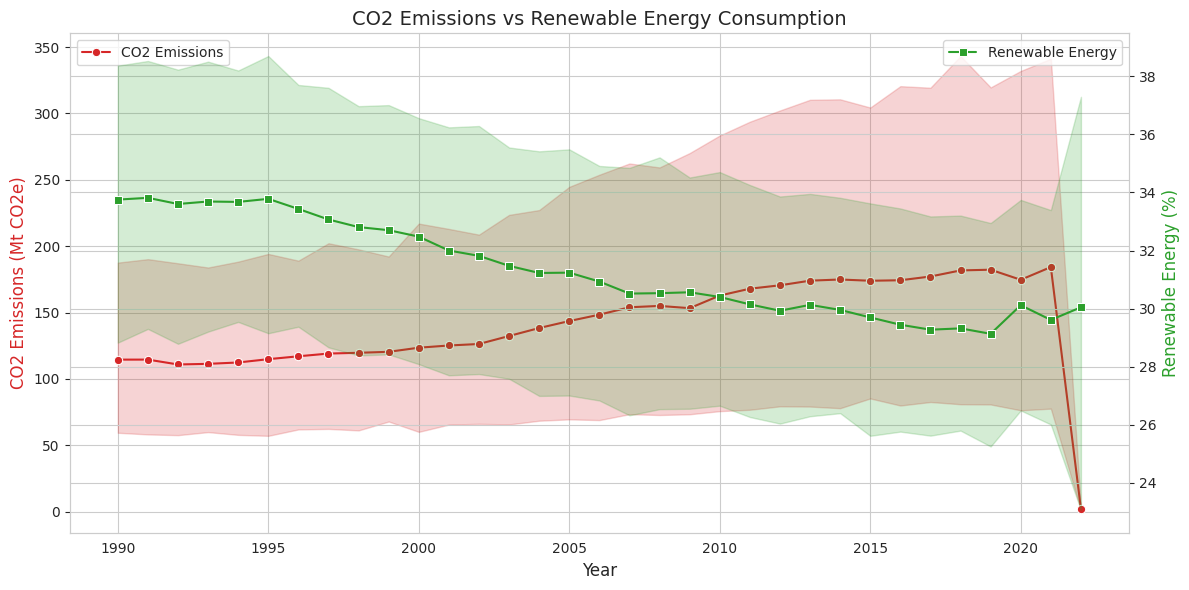

In [ ]:
# explore the dynamic of CO2 emissions and Renewable energy exploitation

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

country_df = pivot_df[pivot_df['country'].isin(countries_df["name"])].copy()
df_clean = country_df.dropna(subset=['renewable_energy_ratio'])

plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

ax1 = sns.lineplot(data=df_clean, x='year', y='carbon_dioxide', 
                   color='tab:red', marker='o', label='CO2 Emissions')
ax2 = ax1.twinx()
sns.lineplot(data=df_clean, x='year', y='renewable_energy_ratio', 
            ax=ax2, color='tab:green', marker='s', label='Renewable Energy')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=45, ha='right')

ax1.set_title('CO2 Emissions vs Renewable Energy Consumption', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('CO2 Emissions (Mt CO2e)', color='tab:red', fontsize=12)
ax2.set_ylabel('Renewable Energy (%)', color='tab:green', fontsize=12)

plt.tight_layout()
plt.show()

Statistics over the World


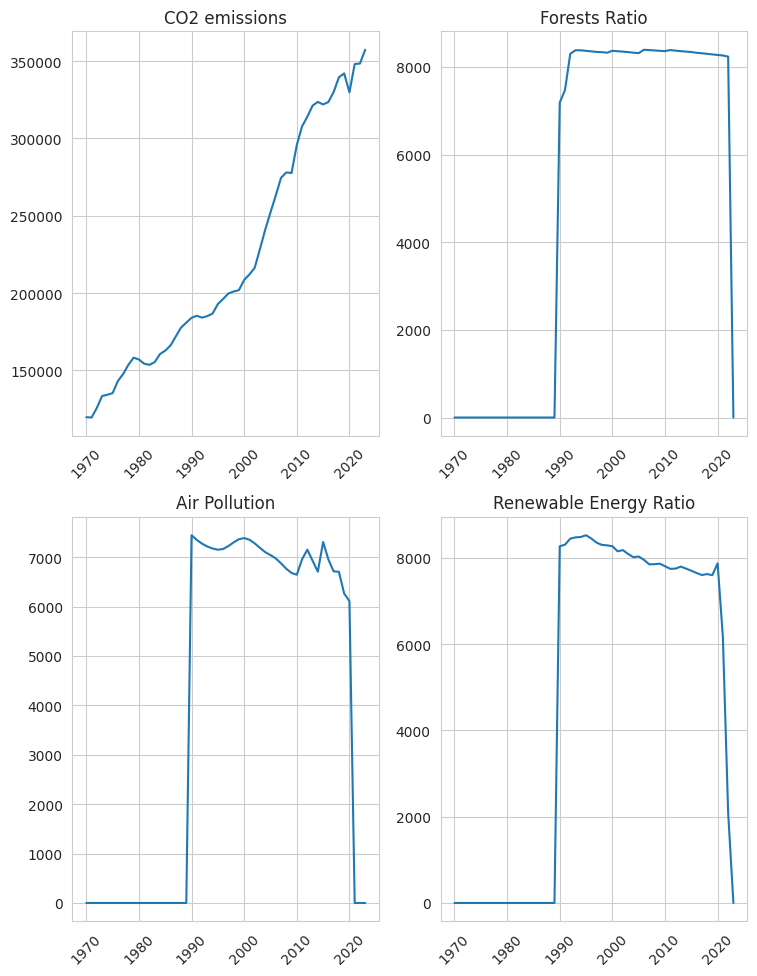

In [66]:
print('Statistics over the World')

fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(10)
plt.subplots_adjust(bottom=0.01, right=0.8, top=0.9)

years = pivot_df['year'].unique()

axs[0, 0].plot(years, pivot_df.groupby('year')['carbon_dioxide'].sum())
axs[0, 0].set_title('CO2 emissions')

axs[0, 1].plot(years, pivot_df.groupby('year')['forests_ratio'].sum())
axs[0, 1].set_title('Forests Ratio')

axs[1, 0].plot(years, pivot_df.groupby('year')['air_pollution'].sum())
axs[1, 0].set_title('Air Pollution')

axs[1, 1].plot(years, pivot_df.groupby('year')['renewable_energy_ratio'].sum())
axs[1, 1].set_title('Renewable Energy Ratio')

for i in [0,1]:
    for j in [0,1]:
        axs[i,j].set_xticks(years[::10])
        axs[i,j].set_xticklabels(years[::10], rotation=45)

plt.show()

Forest Ratio, Air Pollution, and Renewable Energy Ratio are descresed in the end because of absent values.

Here we also can see the trend of increasing CO2 emissions as in the NASA plots. Renewable Energy Ratio is decreased (it's sad).